# Gibi ASMR content analysis
- https://www.youtube.com/channel/UCE6acMV3m35znLcf0JGNn7Q
- https://mattw.io/youtube-metadata/bulk?submit=true&url=https://www.youtube.com/channel/UCE6acMV3m35znLcf0JGNn7Q

In [2]:
import pandas as pd
import numpy as np

In [3]:
file_path = '/Users/laura.kukkonen/Documents/ASMR_project2/ASMR_project2.xlsx'
df = pd.read_excel(file_path)

In [4]:
df

,Title,Author,Length,Published,Views,Likes,Comments,Tag Count,Tag 1,Tag 2,...,Tag 54,Tag 55,Tag 56,Tag 57,Tag 58,Tag 59,Tag 60,Tag 61,Tag 62,Tag 63
0,"Fastest ASMR | Dentist, Eye, Cranial Nerve, Sl...",Gibi ASMR,18m 1s,2021-01-13T00:43:47Z,56673833,829,53016,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Fastest ASMR | Tailor, Haircut, Drawing You, F...",Gibi ASMR,11m 45s,2021-05-06T21:25:01Z,25331756,413444,26884,21,gibi,gibi asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[ASMR] Dark & Relaxing Tapping & Scratching [C...,Gibi ASMR,28m 25s,2018-03-20T21:57:26Z,24646727,206006,14544,27,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[ASMR] Intense Ear Attention & Mouth Sounds (T...,Gibi ASMR,23m 35s,2018-09-15T21:04:51Z,20623505,188821,17383,26,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fastest Medical ASMR | Everything is Wrong! (N...,Gibi ASMR,22m 51s,2022-03-03T23:00:19Z,20368270,340533,18641,22,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,[ASMR Comedy] Team Rocket April Fools - James ...,Gibi ASMR,7m 18s,2017-04-01T11:35:51Z,5222,9452,1422,20,asmr,team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1265,"[ASMR] Sticky Sounds | Daisy, Korra, Raven Gib...",Gibi ASMR,24m 55s,2017-05-06T23:27:47Z,5061,869,1318,14,asmr,sticky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1266,ASMR | Coloring on a Crinkly Cartoon Ball | So...,Gibi ASMR,34m,2022-04-28T22:00:26Z,613,20071,899,12,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1267,"Live ASMR for Your Evening ♡ | Chatting, Trigg...",Gibi ASMR,livestream,2018-10-11T15:13:20Z,0,9,0,3,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tag_columns = df.columns[8:]

In [6]:
tag_views = {}

In [7]:
for index, row in df.iterrows():
    views = row['Views']
    for column in tag_columns:
        tag = row[column]
        if pd.notna(tag):
            if tag in tag_views:
                tag_views[tag] += views
            else:
                tag_views[tag] = views

In [8]:
tag_views_df = pd.DataFrame(list(tag_views.items()), columns=['Tag', 'Views'])
tag_views_df = tag_views_df.sort_values(by='Views', ascending=False)
tag_views_df

,Tag,Views
0,gibi,1521448235
4,asmr,1428214679
5,for sleep,971594561
24,relax,808410372
25,relaxing,688064189
...,...,...
4801,asleep,9414
4802,gems,6753
4803,barnes n noble,6071
4804,speak,5222


In [9]:
file_path = "gibitags_views.xlsx"
tag_views_df.to_excel(file_path, index=False)

In [10]:
filtered_df = tag_views_df[~tag_views_df['Tag'].fillna('').str.lower().str.contains('gibi|asmr', na=False)].copy()

#def format_number(num):
    #return f'{round(num / 1000000)} million' if num >= 1000000 else str(num)

#filtered_df['Views'] = filtered_df['Views'].apply(format_number)
filtered_df.head(10)

,Tag,Views
5,for sleep,971594561
24,relax,808410372
25,relaxing,688064189
29,ear to ear,525504432
62,triggers,483978451
27,whisper,406887921
61,trigger,406411992
22,tapping,404072709
30,binaural,390608716
6,stress relief,351021788


In [11]:
tag_to_filter = 'relax'
tag_filter_mask = df.apply(lambda row: any(str(tag_to_filter).lower() in str(tag).lower() for tag in row.values), axis=1)
for_sleep_videos_df = df[tag_filter_mask]
for_sleep_videos_df.head(5)

,Title,Author,Length,Published,Views,Likes,Comments,Tag Count,Tag 1,Tag 2,...,Tag 54,Tag 55,Tag 56,Tag 57,Tag 58,Tag 59,Tag 60,Tag 61,Tag 62,Tag 63
2,[ASMR] Dark & Relaxing Tapping & Scratching [C...,Gibi ASMR,28m 25s,2018-03-20T21:57:26Z,24646727,206006,14544,27,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[ASMR] Intense Ear Attention & Mouth Sounds (T...,Gibi ASMR,23m 35s,2018-09-15T21:04:51Z,20623505,188821,17383,26,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fastest Medical ASMR | Everything is Wrong! (N...,Gibi ASMR,22m 51s,2022-03-03T23:00:19Z,20368270,340533,18641,22,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ASMR Sleep & Relaxation Treatment ❤︎,Gibi ASMR,28m 23s,2018-01-27T21:24:23Z,17282036,185163,11716,31,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Fastest Medical ASMR | Neurologist, Eye Doctor...",Gibi ASMR,21m 56s,2022-01-29T23:00:19Z,13734887,233816,6852,21,gibi,gibi asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Combining the tag columns again for analysis

In [12]:
df['Combined_Tags'] = df.apply(lambda row: ', '.join(filter(lambda x: isinstance(x, str), [row[f'Tag {i}'] for i in range(1, 64)])), axis=1)
selected_columns = ['Title', 'Author', 'Length', 'Published', 'Views', 'Likes', 'Comments', 'Tag Count', 'Combined_Tags']
selected_df = df[selected_columns]
selected_df

,Title,Author,Length,Published,Views,Likes,Comments,Tag Count,Combined_Tags
0,"Fastest ASMR | Dentist, Eye, Cranial Nerve, Sl...",Gibi ASMR,18m 1s,2021-01-13T00:43:47Z,56673833,829,53016,0,
1,"Fastest ASMR | Tailor, Haircut, Drawing You, F...",Gibi ASMR,11m 45s,2021-05-06T21:25:01Z,25331756,413444,26884,21,"gibi, gibi asmr, fast, fastest, asmr, for..."
2,[ASMR] Dark & Relaxing Tapping & Scratching [C...,Gibi ASMR,28m 25s,2018-03-20T21:57:26Z,24646727,206006,14544,27,"gibi, asmr, tap, tapping, scratching, for..."
3,[ASMR] Intense Ear Attention & Mouth Sounds (T...,Gibi ASMR,23m 35s,2018-09-15T21:04:51Z,20623505,188821,17383,26,"gibi, asmr, intense, ear, ear to ear, att..."
4,Fastest Medical ASMR | Everything is Wrong! (N...,Gibi ASMR,22m 51s,2022-03-03T23:00:19Z,20368270,340533,18641,22,"gibi, asmr, gibi asmr, everything is wrong,..."
...,...,...,...,...,...,...,...,...,...
1264,[ASMR Comedy] Team Rocket April Fools - James ...,Gibi ASMR,7m 18s,2017-04-01T11:35:51Z,5222,9452,1422,20,"asmr, team, rocket, cosplay, ear, to, je..."
1265,"[ASMR] Sticky Sounds | Daisy, Korra, Raven Gib...",Gibi ASMR,24m 55s,2017-05-06T23:27:47Z,5061,869,1318,14,"asmr, sticky, sounds, gibi, sticker, stic..."
1266,ASMR | Coloring on a Crinkly Cartoon Ball | So...,Gibi ASMR,34m,2022-04-28T22:00:26Z,613,20071,899,12,"gibi, asmr, gibi asmr, ollyball, color, c..."
1267,"Live ASMR for Your Evening ♡ | Chatting, Trigg...",Gibi ASMR,livestream,2018-10-11T15:13:20Z,0,9,0,3,"gibi, asmr, live"


# Finding the most watched videos of the most used tags

In [13]:
tag_of_interest = 'zulu toys'
tag_filtered_df = selected_df[selected_df['Combined_Tags'].str.contains(tag_of_interest, na=False)]
sorted_df = tag_filtered_df.sort_values(by='Views', ascending=False)
#sorted_df
top_5_videos = sorted_df.head(5)
top_5_videos

,Title,Author,Length,Published,Views,Likes,Comments,Tag Count,Combined_Tags
961,ASMR | Mini Food Restaurant [1 Hour Whispered RP],Gibi ASMR,1h 19s,2023-09-02T22:00:12Z,531245,13813,617,18,"gibi, asmr, gibi asmr, minis, mini food, ..."


In [14]:
mean_tagcount = df['Tag Count'].mean().round()
max_tagcount = df['Tag Count'].max()
min_tagcount = df['Tag Count'].min()
std_tagcount = df['Tag Count'].std()
max_tagcount

63

In [15]:
df['Views'].mean().round()

1623349.0

In [16]:
value_sorted = df.sort_values(by='Views', ascending=False)
top_ten = value_sorted.head(10)
top_ten

,Title,Author,Length,Published,Views,Likes,Comments,Tag Count,Tag 1,Tag 2,...,Tag 55,Tag 56,Tag 57,Tag 58,Tag 59,Tag 60,Tag 61,Tag 62,Tag 63,Combined_Tags
0,"Fastest ASMR | Dentist, Eye, Cranial Nerve, Sl...",Gibi ASMR,18m 1s,2021-01-13T00:43:47Z,56673833,829,53016,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,"Fastest ASMR | Tailor, Haircut, Drawing You, F...",Gibi ASMR,11m 45s,2021-05-06T21:25:01Z,25331756,413444,26884,21,gibi,gibi asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"gibi, gibi asmr, fast, fastest, asmr, for..."
2,[ASMR] Dark & Relaxing Tapping & Scratching [C...,Gibi ASMR,28m 25s,2018-03-20T21:57:26Z,24646727,206006,14544,27,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"gibi, asmr, tap, tapping, scratching, for..."
3,[ASMR] Intense Ear Attention & Mouth Sounds (T...,Gibi ASMR,23m 35s,2018-09-15T21:04:51Z,20623505,188821,17383,26,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"gibi, asmr, intense, ear, ear to ear, att..."
4,Fastest Medical ASMR | Everything is Wrong! (N...,Gibi ASMR,22m 51s,2022-03-03T23:00:19Z,20368270,340533,18641,22,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"gibi, asmr, gibi asmr, everything is wrong,..."
5,ASMR Sleep & Relaxation Treatment ❤︎,Gibi ASMR,28m 23s,2018-01-27T21:24:23Z,17282036,185163,11716,31,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"gibi, asmr, sleep, relaxation, relax, tre..."
6,The Cranial Nerve Exam - ASMR,Gibi ASMR,50m 7s,2016-10-30T21:20:14Z,15856939,122189,18047,48,cranial,nerve,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"cranial, nerve, exam, examination, asmr, ..."
7,100 Fastest ASMR Roleplays in a Row [3 Hours],Gibi ASMR,2h 58m 40s,2022-11-30T23:00:00Z,13741742,128099,4301,33,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"gibi, asmr, gibi asmr, fastest, 3 hours, ..."
8,"Fastest Medical ASMR | Neurologist, Eye Doctor...",Gibi ASMR,21m 56s,2022-01-29T23:00:19Z,13734887,233816,6852,21,gibi,gibi asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"gibi, gibi asmr, fastest, doctor, medical,..."
9,ASMR | Slow & Calm Triggers for Sleep,Gibi ASMR,36m 5s,2019-05-10T00:34:03Z,13330697,17586,9984,32,gibi,asmr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"gibi, asmr, gentle, calm, slow, trigger, ..."


In [17]:
top_ten['Tag Count'].max()

48

In [18]:
file_path = '/Users/laura.kukkonen/Documents/ASMR_project2/gibitags.xlsx'
df2 = pd.read_excel(file_path)

In [19]:
df2

,Tag,First used,Last used,Count
0,gibi,2016-06-19,2024-02-03,992
1,asmr,2016-06-19,2024-02-03,953
2,for sleep,2016-12-12,2024-02-03,549
3,relax,2016-08-30,2024-02-03,482
4,relaxing,2016-08-30,2024-02-03,436
...,...,...,...,...
4761,zippo,2019-01-12,2019-01-12,1
4762,zoe,2019-04-28,2019-04-28,1
4763,zoo,2021-07-04,2021-07-04,1
4764,zubat,2018-01-03,2018-01-03,1


In [25]:
tag_columns = df2[['Tag', 'Last used', 'Count']]
tag_columns

,Tag,Last used,Count
0,gibi,2024-02-03,992
1,asmr,2024-02-03,953
2,for sleep,2024-02-03,549
3,relax,2024-02-03,482
4,relaxing,2024-02-03,436
...,...,...,...
4761,zippo,2019-01-12,1
4762,zoe,2019-04-28,1
4763,zoo,2021-07-04,1
4764,zubat,2018-01-03,1


In [32]:
sorted_by_count = df2[['Tag', 'Last used', 'Count']].sort_values(by='Count', ascending=True)
sorted_by_count.tail(60)


,Tag,Last used,Count
59,dark,2024-02-03,35
58,food,2023-12-27,36
57,exam,2023-03-22,37
56,daisy,2023-12-27,37
55,bottle,2022-07-21,37
54,attention,2020-10-17,37
51,book,2023-09-06,39
53,touch,2019-10-22,39
52,doctor,2023-04-29,39
50,for relaxation,2021-02-06,40


In [21]:
df2['Count'].value_counts().head(15).sort_index()

Count
1     2965
2      663
3      300
4      197
5      112
6       88
7       71
8       45
9       32
10      37
11      35
12      16
13      14
14      17
16      14
Name: count, dtype: int64

In [104]:
file_path = "gibitags_new.xlsx"
tag_columns.to_excel(file_path, index=False)

In [105]:
df2['Count'].count()

4766

In [136]:
gibitags_new_df = pd.read_excel('/Users/laura.kukkonen/Documents/ASMR_project2/gibitags_new.xlsx')
gibitags_views_df = pd.read_excel('/Users/laura.kukkonen/Documents/ASMR_project2/gibitags_views.xlsx')
gibitags_new_df.head(20), gibitags_views_df.head(20)


(              Tag  Last used  Count
 0            gibi 2024-02-03    992
 1            asmr 2024-02-03    953
 2       for sleep 2024-02-03    549
 3           relax 2024-02-03    482
 4        relaxing 2024-02-03    436
 5       gibi asmr 2024-02-03    389
 6      ear to ear 2024-01-27    266
 7         tapping 2024-01-31    227
 8         whisper 2023-12-23    226
 9        triggers 2024-01-27    221
 10  stress relief 2024-02-03    201
 11       binaural 2024-02-03    175
 12    soft spoken 2024-01-31    175
 13        trigger 2023-10-18    166
 14     whispering 2024-01-24    145
 15            tap 2023-05-27    134
 16          sleep 2023-10-28    120
 17          funny 2023-09-27    103
 18       roleplay 2019-04-14     96
 19         sounds 2023-08-26     94,
               Tag       Views
 0            gibi  1521448235
 1            asmr  1428214679
 2       for sleep   971594561
 3           relax   808410372
 4        relaxing   688064189
 5       gibi asmr   579714640
 6   

In [139]:
gibitags_views_aggregated = gibitags_views_df.groupby('Tag')['Views'].sum().reset_index()


In [140]:
merged_df = pd.merge(gibitags_new_df, gibitags_views_aggregated, on='Tag')
merged_df.head(20)


,Tag,Last used,Count,Views
0,gibi,2024-02-03,992,1732688722
1,asmr,2024-02-03,953,1646866327
2,for sleep,2024-02-03,549,973596586
3,relax,2024-02-03,482,809310880
4,relaxing,2024-02-03,436,690157425
5,gibi asmr,2024-02-03,389,598886637
6,ear to ear,2024-01-27,266,526463988
7,tapping,2024-01-31,227,406092288
8,whisper,2023-12-23,226,408664200
9,triggers,2024-01-27,221,484878959


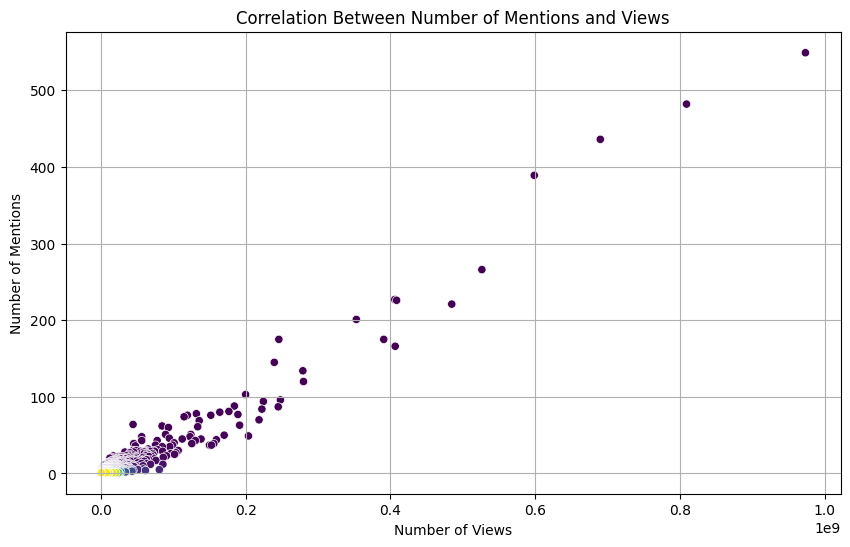

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df_plot = merged_df[~merged_df['Tag'].isin(['gibi', 'asmr'])]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df_plot, x='Views', y='Count', hue='Tag', palette='viridis', legend=False)

plt.title('Correlation Between Number of Mentions and Views')
plt.xlabel('Number of Views')
plt.ylabel('Number of Mentions')
#plt.xscale('log')  # Using a logarithmic scale for better visualization, if needed
#plt.yscale('log')  # Using a logarithmic scale for better visualization, if needed
plt.grid(True)

plt.show()